In [1]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2

In [2]:
from christmais import FastTextWrapper
from nltk.corpus import brown # or any other corpus
from christmais import (get_fasttext_pretrained, Artist)
from christmais import Predictor
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


In [3]:
model = get_fasttext_pretrained(load=True)
seed = model.transform("Thinking Machines Data Science")
artist = Artist(seed, dims=(224, 224)) 

INFO:gensim.utils:loading FastTextWrapper object from C:\Users\ISSATI~1\AppData\Local\Temp\brown_fasttext.model
INFO:gensim.utils:loading wv recursively from C:\Users\ISSATI~1\AppData\Local\Temp\brown_fasttext.model.wv.* with mmap=None
INFO:gensim.utils:setting ignored attribute vectors_norm to None
INFO:gensim.utils:setting ignored attribute vectors_vocab_norm to None
INFO:gensim.utils:setting ignored attribute vectors_ngrams_norm to None
INFO:gensim.utils:setting ignored attribute buckets_word to None
INFO:gensim.utils:loading vocabulary recursively from C:\Users\ISSATI~1\AppData\Local\Temp\brown_fasttext.model.vocabulary.* with mmap=None
INFO:gensim.utils:loading trainables recursively from C:\Users\ISSATI~1\AppData\Local\Temp\brown_fasttext.model.trainables.* with mmap=None
INFO:gensim.utils:loaded C:\Users\ISSATI~1\AppData\Local\Temp\brown_fasttext.model


In [8]:
img = artist.draw()

In [12]:
p = Predictor()

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


In [15]:
help(p.predict)

Help on method predict in module christmais.predictor:

predict(X, target, top_classes=5) method of christmais.predictor.Predictor instance
    Calculates the score for each input image relative to the target label
    
    Parameters
    ----------
    X : np.ndarray
        Input image matrix
    target: str
        The target ImageNet class label.
    top_classes : int (default is 5)
        Number of top classes to return
    
    Returns
    -------
    (float, dict)
        A tuple of values where float is the class probability of the
        target ImageClass, and dict contains the top_classes classes with
        the highest class probabilities



In [18]:
img_as_array = np.array(img)

In [19]:
img_as_array.shape

(224, 224, 3)

In [23]:
scores, results = p.predict(X=img, target="iron")

..\christmais\predictor.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = sm(fc_out)


In [24]:
scores

0.0003216064

In [25]:
results

{'resnet152': {'Afghan hound': 4.271854e-06,
  'African chameleon': 2.8417402e-05,
  'African crocodile': 7.477757e-06,
  'African elephant': 2.6900128e-05,
  'African grey': 3.8778504e-05,
  'African hunting dog': 5.6459717e-06,
  'Airedale': 1.1540365e-05,
  'American Staffordshire terrier': 2.5892148e-06,
  'American alligator': 2.0406384e-05,
  'American black bear': 7.2687058e-06,
  'American chameleon': 1.5229956e-05,
  'American coot': 3.8681734e-05,
  'American egret': 2.744696e-05,
  'American lobster': 2.0886484e-05,
  'Angora': 7.3259594e-06,
  'Appenzeller': 4.8099555e-06,
  'Arabian camel': 1.2655842e-05,
  'Arctic fox': 1.0514278e-05,
  'Australian terrier': 1.0450778e-05,
  'Band Aid': 0.0056518633,
  'Bedlington terrier': 2.5402429e-05,
  'Bernese mountain dog': 9.743324e-06,
  'Blenheim spaniel': 4.0658497e-06,
  'Border collie': 1.3947898e-05,
  'Border terrier': 6.0508464e-06,
  'Boston bull': 2.7079455e-05,
  'Bouvier des Flandres': 3.2577853e-05,
  'Brabancon griff

In [26]:
help(p.plot_results)

Help on method plot_results in module christmais.predictor:

plot_results(results, top_n=10, size=(3, 4)) method of christmais.predictor.Predictor instance
    Plots the probabilities of the top n labels
    
    Parameters
    ----------
    results : dict
        Contains the class probabilities of each imagenet label for each model
    top_n : int (default is 10)
        The number of imagenet labels to plot, for each model
    size: tuple (default is (3,4))
        Size of each graph



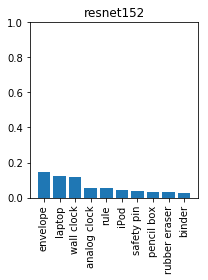

In [27]:
p.plot_results(results)

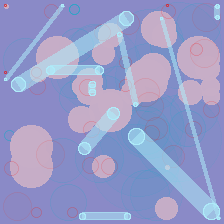

In [28]:
img

In [30]:
n = 10
for i in range(n):
    img = artist.draw() # make it draw n times
    score, results = p.predict(img, "iron") # predict image every time
    print(score)

..\christmais\predictor.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = sm(fc_out)


0.00030676133


..\christmais\predictor.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = sm(fc_out)


0.00019357912


..\christmais\predictor.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = sm(fc_out)


0.00044441284


..\christmais\predictor.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = sm(fc_out)


0.00024181805


..\christmais\predictor.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = sm(fc_out)


6.291918e-06


..\christmais\predictor.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = sm(fc_out)


0.00023866261


..\christmais\predictor.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = sm(fc_out)


0.0001331052


..\christmais\predictor.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = sm(fc_out)


2.2517306e-05


..\christmais\predictor.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = sm(fc_out)


3.805523e-05


..\christmais\predictor.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = sm(fc_out)


2.964334e-05
